In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from scipy.optimize import curve_fit

In [2]:
data = []
with open("VDF_4_Masterclass.txt","r") as f:
    data = [l.split() for l  in f.readlines()]
data = pd.DataFrame(data = data[2:],columns=data[0])
data = data.apply(pd.to_numeric)
#data[["Phi(deg)","Theta"]]=data[["Phi(deg)","Theta"]].applymap(lambda x: int(x))

In [3]:
data

,E(eV),dE(eV),Phi(deg),dPhi,Theta,dTheta,Log10(FDV)
0,13.6439,4.5626,112.875,22.5,-11.25,22.5,-10.1696
1,13.6439,4.5626,90.375,22.5,-11.25,22.5,-10.2840
2,13.6439,4.5626,112.875,22.5,-33.75,22.5,-10.1896
3,13.6439,4.5626,90.375,22.5,-33.75,22.5,-10.2780
4,13.6439,4.5626,135.375,22.5,-11.25,22.5,-10.0942
...,...,...,...,...,...,...,...
1315,1170.5598,326.9329,325.875,22.5,33.75,22.5,-17.7569
1316,1170.5598,326.9329,348.375,22.5,33.75,22.5,-17.3309
1317,1170.5598,326.9329,292.125,45.0,56.25,22.5,-17.5062
1318,1170.5598,326.9329,337.125,45.0,56.25,22.5,-17.4684


In [4]:
data.dtypes

E(eV)         float64
dE(eV)        float64
Phi(deg)      float64
dPhi          float64
Theta         float64
dTheta        float64
Log10(FDV)    float64
dtype: object

In [5]:
data[data["Theta"]==78.75]["Phi(deg)"].sort_values().unique()

array([ 34.125,  34.875,  35.625,  36.375,  37.125,  37.875,  38.625,
        39.375,  40.125,  40.875,  41.625,  42.375,  43.125,  43.875,
        44.625, 124.125, 124.875, 125.625, 126.375, 127.125, 127.875,
       128.625, 129.375, 130.125, 130.875, 131.625, 132.375, 133.125,
       133.875, 134.625, 214.125, 214.875, 215.625, 216.375, 217.125,
       217.875, 218.625, 219.375, 220.125, 220.875, 221.625, 222.375,
       223.125, 223.875, 224.625, 304.125, 304.875, 305.625, 306.375,
       307.125, 307.875, 308.625, 309.375, 310.125, 310.875, 311.625,
       312.375, 313.125, 313.875, 314.625])

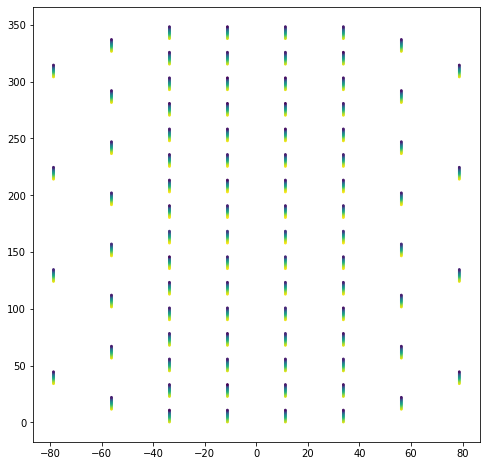

In [7]:
# Sort coordinates and reshape in grid
#idx = np.lexsort((data["Theta"], data["Phi(deg)"])).reshape(8,165)
# Plot
plt.figure(figsize=(8,8))
plt.scatter(data["Theta"], data["Phi(deg)"], c=data["Log10(FDV)"],s=3)


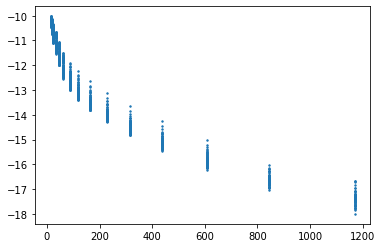

In [14]:
plt.scatter(data["E(eV)"],data["Log10(FDV)"],s=2)

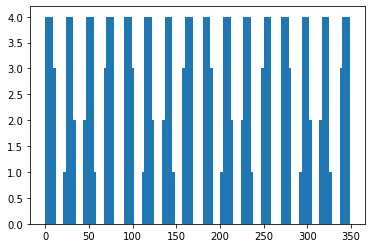

In [18]:
_=plt.hist(data[data["Theta"]==-11.25]["Phi(deg)"],bins=120)

In [10]:
def find_intervals(arr,thr):
    act = []
    batch = []
    batchact = [0]
    for i in range(1,len(arr)):
        if(arr[i]-arr[batchact[-1]])<=thr:
            batchact.append(i)
        else:
            batch.append([arr[i] for i in batchact])
            
            batchact = [i]
    batch.append([arr[i] for i in batchact])
    
    limbatch = [[np.min(b),np.max(b)] for b in batch] 
    return batch,limbatch
        
                   

In [11]:
data["Phi_bin"] = "o"
data["ang_bin"] = "o"
data["Log10(FDV)_norm"] = "o"
for tval in data["Theta"].unique():
    f_intervals = find_intervals(data[data["Theta"]==tval]["Phi(deg)"].sort_values().values,0.8)
    interv = f_intervals[1]
    for idx,row in data[data["Theta"]==tval].iterrows():
        for ii in range(len(interv)):
            
            if row["Phi(deg)"]>=interv[ii][0] and row["Phi(deg)"]<= interv[ii][1]:
                mnval = np.mean([interv[ii][0],interv[ii][1]])
                data.loc[idx,"Phi_bin"] = "{}".format(mnval)
                data.loc[idx,"ang_bin"] = "{} {}".format(mnval,row["Theta"])
                data.loc[idx,"Log10(FDV)_norm"] = row["Log10(FDV)"]/abs(interv[ii][1]-interv[ii][0])
                #print(row["Phi_bin"])

/home/localuser/Documents/work_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/localuser/Documents/work_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/localuser/Documents/work_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/localuser/Documents/work_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/localuser/Documents/work_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/localuser/Documents/work_env/lib/python

/home/localuser/Documents/work_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/localuser/Documents/work_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/localuser/Documents/work_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/localuser/Documents/work_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/localuser/Documents/work_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/localuser/Documents/work_env/lib/python

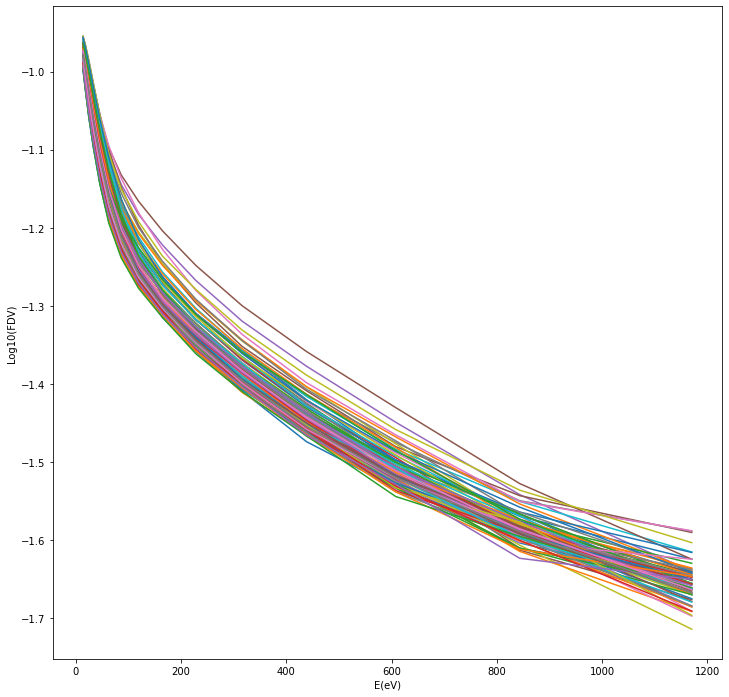

In [49]:
def fitfunc(x,a,b):
    return a*x + b


cuts = [100,800]
fit_params = {}
plt.figure(figsize=(12,12))
for i in data["ang_bin"].unique():
    ii = data["ang_bin"]==i
    fit_params[i] = {'region1':[],'region2':[],'region3':[]}
    xx = data[ii]["E(eV)"]
    yy = data[ii]["Log10(FDV)_norm"]
    
    iix1 = xx < cuts[0]
    iix2 = np.logical_and(xx >= cuts[0], xx < cuts[1])
    iix3 = xx >= cuts[1]
    
    popt1,cov1 = curve_fit(fitfunc,xx[iix1],yy[iix1])
    popt2,cov2 = curve_fit(fitfunc,xx[iix2],yy[iix2])
    popt3,cov3 = curve_fit(fitfunc,xx[iix3],yy[iix3])
    
    fit_params[i]['region1'] = popt1
    fit_params[i]['region2'] = popt2
    fit_params[i]['region3'] = popt3
    
    plt.plot(xx,yy)
    #plt.xscale("log")
    plt.ylabel("Log10(FDV)")
    plt.xlabel("E(eV)")

In [48]:
for k in fit_params:
    

{'118.125 -11.25': {'region1': array([-0.00321871, -0.92629993]),
  'region2': array([-5.96533652e-04, -1.15287317e+00]),
  'region3': array([-2.93521803e-04, -1.31884375e+00])},
 '95.625 -11.25': {'region1': array([-0.00351644, -0.93338103]),
  'region2': array([-5.59526898e-04, -1.18730047e+00]),
  'region3': array([-1.98817616e-04, -1.41494828e+00])},
 '118.125 -33.75': {'region1': array([-0.0032681, -0.9269064]),
  'region2': array([-5.87016902e-04, -1.16203553e+00]),
  'region3': array([-2.21860068e-04, -1.40309000e+00])},
 '95.625 -33.75': {'region1': array([-0.00337241, -0.93622762]),
  'region2': array([-5.81766211e-04, -1.17173217e+00]),
  'region3': array([-2.04964212e-04, -1.41097237e+00])},
 '140.625 -11.25': {'region1': array([-0.00293262, -0.92294088]),
  'region2': array([-5.69568190e-04, -1.12091907e+00]),
  'region3': array([-3.00484060e-04, -1.28839877e+00])},
 '163.125 -11.25': {'region1': array([-0.00299984, -0.91454022]),
  'region2': array([-6.12369197e-04, -1.132

In [26]:
data["Phi_bin"].unique()

array(['118.125', '95.625', '140.625', '163.125', '106.875', '151.875',
       '129.375', '230.625', '253.125', '208.125', '185.625', '241.875',
       '196.875', '219.375', '50.625', '73.125', '28.125', '5.625',
       '61.875', '16.875', '39.375', '298.125', '275.625', '320.625',
       '343.125', '286.875', '331.875', '309.375'], dtype=object)

In [27]:
data


,E(eV),dE(eV),Phi(deg),dPhi,Theta,dTheta,Log10(FDV),Phi_bin,ang_bin,Log10(FDV)_norm
0,13.6439,4.5626,112.875,22.5,-11.25,22.5,-10.1696,118.125,118.125 -11.25,-0.968533
1,13.6439,4.5626,90.375,22.5,-11.25,22.5,-10.2840,95.625,95.625 -11.25,-0.979429
2,13.6439,4.5626,112.875,22.5,-33.75,22.5,-10.1896,118.125,118.125 -33.75,-0.970438
3,13.6439,4.5626,90.375,22.5,-33.75,22.5,-10.2780,95.625,95.625 -33.75,-0.978857
4,13.6439,4.5626,135.375,22.5,-11.25,22.5,-10.0942,140.625,140.625 -11.25,-0.961352
...,...,...,...,...,...,...,...,...,...,...
1315,1170.5598,326.9329,325.875,22.5,33.75,22.5,-17.7569,320.625,320.625 33.75,-1.691133
1316,1170.5598,326.9329,348.375,22.5,33.75,22.5,-17.3309,343.125,343.125 33.75,-1.650562
1317,1170.5598,326.9329,292.125,45.0,56.25,22.5,-17.5062,286.875,286.875 56.25,-1.667257
1318,1170.5598,326.9329,337.125,45.0,56.25,22.5,-17.4684,331.875,331.875 56.25,-1.663657


In [28]:
def find_opposite(theta,phi):
    return -theta,(phi+180)%360

In [29]:
data["ang_bin"].unique()

array(['118.125 -11.25', '95.625 -11.25', '118.125 -33.75',
       '95.625 -33.75', '140.625 -11.25', '163.125 -11.25',
       '140.625 -33.75', '163.125 -33.75', '106.875 -56.25',
       '151.875 -56.25', '129.375 -78.75', '118.125 11.25',
       '95.625 11.25', '118.125 33.75', '95.625 33.75', '140.625 11.25',
       '163.125 11.25', '140.625 33.75', '163.125 33.75', '106.875 56.25',
       '151.875 56.25', '129.375 78.75', '230.625 -11.25',
       '253.125 -11.25', '230.625 -33.75', '253.125 -33.75',
       '208.125 -11.25', '185.625 -11.25', '208.125 -33.75',
       '185.625 -33.75', '241.875 -56.25', '196.875 -56.25',
       '219.375 -78.75', '230.625 11.25', '253.125 11.25',
       '230.625 33.75', '253.125 33.75', '208.125 11.25', '185.625 11.25',
       '208.125 33.75', '185.625 33.75', '241.875 56.25', '196.875 56.25',
       '219.375 78.75', '50.625 -11.25', '73.125 -11.25', '50.625 -33.75',
       '73.125 -33.75', '28.125 -11.25', '5.625 -11.25', '28.125 -33.75',
       '5.6

In [33]:
for ab in data["ang_bin"].unique():
    phi,th = ab.split()
    nth,nphi = find_opposite(float(th),float(phi))
    print("{} {}".format(nphi,nth) in data["ang_bin"].unique())
    

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
